In [2]:
import numpy as np
import matplotlib.pyplot as plt

hello


This notebook uses simple Python code to numerically solve some ODEs. The code is based on the book "Solving Ordinary Differential Equations in Python" by Jason Sundnes with added notes and code snippets to expand the explanations further. The wonderful book is available for free at https://sundnes.github.io/solving_odes_in_python/ode_book.pdf

Sections 1.1-1.2 covered.

This simple differential equation is given by dy/dx = y.
The solution to this differential equation is given by y = C e^X where C is a constant.
Then the value at y will be as below


In [3]:
u0 = 1
t = 4
u0 * np.exp(t)

54.598150033144236

We can calculate the values numerically without even knowing the solution to the differential equation using Euler's method.
We just need the initial value of y and the step size.

38.33759992447473


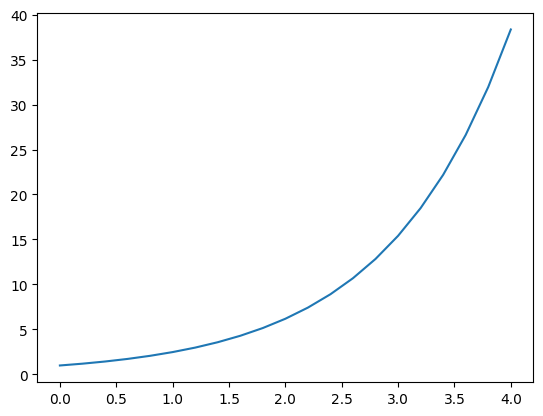

In [4]:
T = 4
N = 20
dt = T/N
u0 = 1
t = np.zeros(N + 1)
u = np.zeros(N + 1)
u[0] = u0
for n in range(N):
    t[n + 1] = t[n] + dt
    u[n + 1] = (1 + dt) * u[n]
plt.plot(t, u)
print(u[-1])

As we decrease the step size, the value of y will be closer to the actual value of e^x. Increase resolution to get a more accurate result.  Why? Change is compounding. The large the step size, the fewer compounding events occur and the less accurate the result.

54.510839574195096


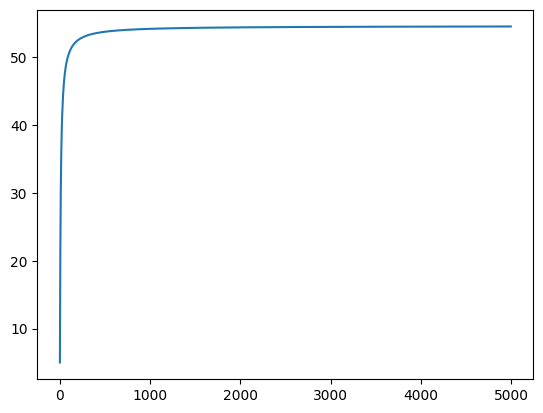

In [5]:
# Make N a range of 1 to 20000
Nrange = np.arange(1, 5000, 5)
results = np.zeros(len(Nrange))
for i, N in enumerate(Nrange):
    dt = T/N
    un = 1
    # We dont need to keep interim values this time, only interested in final value per run
    for n in range(N):
        un+=  dt * un
    results[i] = un
plt.plot(Nrange, results)
print(un)

For the more general case...

In [6]:
def forward_euler(f, u0, T, N):
    """Solve u’=f(t, u), u(0)=u0, with n steps until t=T."""
    t = np.zeros(N + 1)
    u = np.zeros(N + 1) # u[n] is the solution at time t[n]
    u[0] = u0
    dt = T / N
    for n in range(N):
        t[n + 1] = t[n] + dt
        u[n + 1] = u[n] + dt * f(t[n], u[n])

    return t, u

def f(t, u):
    """As long as know the function f (dy/dx), we can call it here"""
    return u

u0 = 1
T = 4
N = 500
t, u = forward_euler(f, u0, T, N)
u[-1]

53.73608902041421

In [7]:

class ForwardEuler_v0:
    def __init__(self, f):
        self.f = f

    def set_initial_condition(self, u0):
        self.u0 = u0

    def solve(self, t_span, N):
        """Compute solution for t_span[0] <= t <= t_span[1],
        using N steps."""
        t0, T = t_span
        self.dt = T / N
        self.t = np.zeros(N + 1) # N steps ~ N+1 time points
        self.u = np.zeros(N + 1)
        msg = "Please set initial condition before calling solve"
        assert hasattr(self, "u0"), msg
        self.t[0] = t0
        self.u[0] = self.u0
        for n in range(N):
            self.n = n
            self.t[n + 1] = self.t[n] + self.dt
            self.u[n + 1] = self.advance()
        return self.t, self.u
    
    def advance(self):
        """Advance the solution one time step."""
        # Create local variables to get rid of "self." in
        # the numerical formula
        u, dt, f, n, t = self.u, self.dt, self.f, self.n, self.t
        return u[n] + dt * f(t[n], u[n])

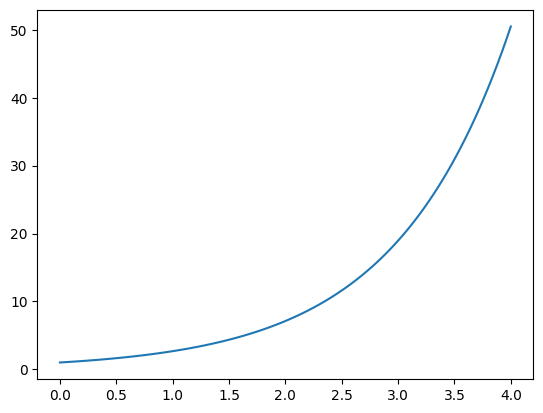

In [8]:
u0 = 1
method = ForwardEuler_v0(f)
method.set_initial_condition(u0)
t, u = method.solve(t_span=(0, 4), N=100)
plt.plot(t, u)

Handy to house functions in class with callable with a signature matching what is expected by the solver. One advantage is that now we can cater for functions that require extra preparatory steps. The initializaiton of the class takes care of those steps while the call method remains standard and can be used by the solver.

In [69]:
class Logistic:
    def __init__(self, alpha, R):
        self.alpha, self.R = alpha, float(R)
    def __call__(self, t, u):
        return self.alpha * u * (1 - u / self.R)
    
problem = Logistic(alpha=0.2, R=1.0)
solver = ForwardEuler_v0(problem)
u0 = 0.1
solver.set_initial_condition(u0)
T = 40
t, u = solver.solve(t_span=(0, T), N=400) 
